In [145]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import env

In [146]:
from pydataset import data

In [147]:
mpg = data('mpg')

In [148]:
mpg.groupby('manufacturer')['cty', 'hwy'].mean().sort_values(by='hwy')

,cty,hwy
manufacturer,,
land rover,11.500000,16.500000
lincoln,11.333333,17.000000
jeep,13.500000,17.625000
dodge,13.135135,17.945946
mercury,13.250000,18.000000
ford,14.000000,19.360000
chevrolet,15.000000,21.894737
nissan,18.076923,24.615385
toyota,18.529412,24.911765


In [149]:
mpg.manufacturer.nunique()

15

In [150]:
mpg.model.nunique()

38

In [151]:
mpg['transmission_type'] = mpg.trans.str[:-4]
mpg.groupby('transmission_type')['cty', 'hwy'].mean()

,cty,hwy
transmission_type,,
auto,15.968153,22.292994
manual,18.675325,25.779221


In [152]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [153]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [154]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [155]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [156]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [176]:
def get_db_url(user,host,password, db_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

In [178]:
employees_url = get_db_url(user, host, password, 'employees' )

In [179]:
query = 'select * from employees limit 20'

In [181]:
employees = pd.read_sql(query, employees_url)

In [182]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


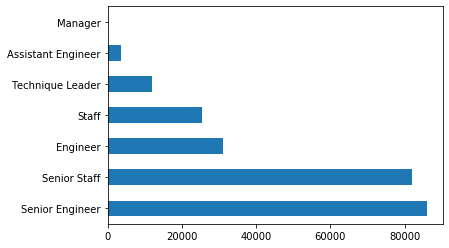

In [187]:
query = 'SELECT * FROM titles'
titles = pd.read_sql(query, employees_url)
titles[titles.to_date == titles.to_date.max()].title.value_counts().plot.barh()

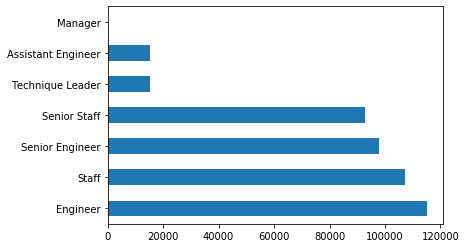

In [188]:
titles.title.value_counts().plot.barh()

In [40]:
employee_titles = pd.merge(employees, titles, left_on="emp_no", right_on="emp_no", how="inner")
employee_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

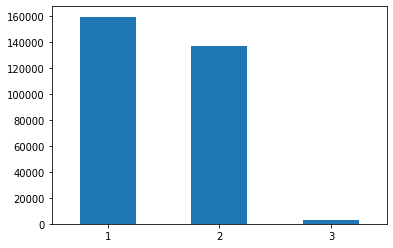

In [189]:
titles.groupby('emp_no').title.count().value_counts().plot.bar()
plt.xticks(rotation=0)

In [193]:
title_counts = titles.groupby('emp_no').title.count()
title_counts.value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

In [41]:
import datetime
title_with_currentdate = employee_titles.to_date == datetime.date (9999,1,1)
emp_title_with_currentdate = employee_titles[title_with_currentdate]
emp_title_with_currentdate

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
443300,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01
443302,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [42]:
query = "SELECT emp_no, dept_name FROM employees_with_departments"

In [43]:
department = pd.read_sql(query, url)
department

,emp_no,dept_name
0,10011,Customer Service
1,10038,Customer Service
2,10049,Customer Service
3,10060,Customer Service
4,10088,Customer Service
...,...,...
331598,499976,Sales
331599,499980,Sales
331600,499986,Sales
331601,499987,Sales


In [44]:
titles_with_deptname = pd.merge(employee_titles, department)
titles_with_deptname.to_date == datetime.date (9999,1,1)
titles_with_deptname[titles_with_deptname.to_date == datetime.date (9999,1,1)]

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,Development
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,Sales
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,Production
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,Production
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01,Human Resources
...,...,...,...,...,...,...,...,...,...,...
489895,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01,Production
489897,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01,Production
489899,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,Development
489900,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,Finance


In [45]:
pd.crosstab(titles_with_deptname.title,titles_with_deptname.dept_name )

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0


In [62]:
db_name = 'chipotle'
url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [76]:
orders = pd.read_sql('select * from orders', url)
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [77]:
orders['total_price'] = orders.quantity * orders.item_price
orders

,id,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,$2.39
1,2,1,1,Izze,[Clementine],$3.39,$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,$16.98 $16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,$8.75


In [101]:
orders.item_price = orders.item_price.str.replace('$', '').astype(float)

In [102]:
orders.groupby('item_name').item_price.sum().nlargest(10)

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price, dtype: float64